## SIR Example

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (19, 5)

Populating the interactive namespace from numpy and matplotlib


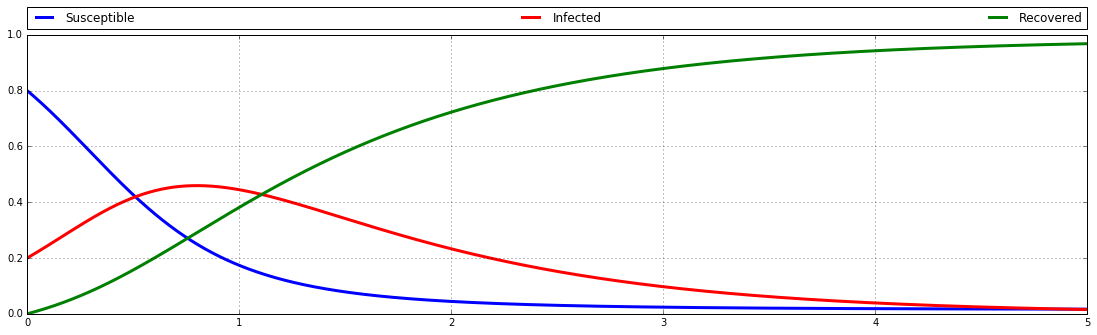

In [2]:
from SIR import *
sir = SIR(tstart=0.00, tend=5, dt=.001, beta=4, gamma=1, N=1)
sir.Initialize(S0=0.8, I0=0.2, R0=0);
sir.Simulate();
sir.PlotSIR(1)

## Prepare data

In [3]:
import random as rn
eps    = 0.05
noise  = eps*np.random.randn(3,sir._Time.shape[0])
dnoise = eps*np.random.randn(3,sir._Time.shape[0])

data  = np.transpose(np.insert(np.array([sir._SS , sir._II , sir._RR]) + noise,0,sir._Time,axis=0))
ddata = np.transpose(np.insert(np.array([sir._dSS, sir._dII, sir._dRR])+dnoise,0,sir._Time,axis=0))

## SINDy at work

Initiated a class for Sparse Identification from Numerical Dynamics
**** Derivative Set ****
**** Candidate functions library has been created ****
**** Performing regression. Please wait... ****
Iteration in progress:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
**** Identification is complete. We now use it to simulate the system. ****


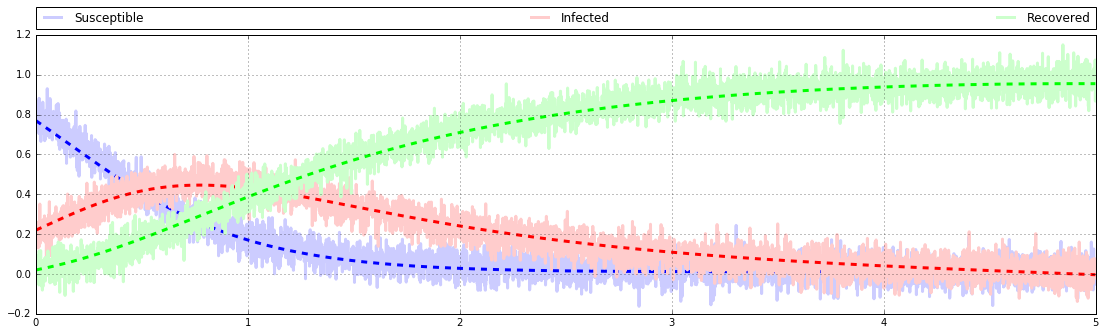

In [4]:
from SINDy import *
sin = SINDy(data=data,polyorder=2,usesine=False,cutoff=0.4)
sin.SetDerivative(ddata)
sin.RunSINDy(simulate=True)
sin.SINDyPlot(statesymbols=["Susceptible","Infected","Recovered"],
              datacolors=[[0.8, 0.8, 1.0],[1.0, 0.8, 0.8],[0.8, 1.0, 0.8]],
              simcolors =[[0.0, 0.0, 1.0],[1.0, 0.0, 0.0],[0.0, 1.0, 0.0]])

In [5]:
sin.StringModelView(StateVariables=["S","I","R"])

dS/dt =  0.00 + -1.61 S  + -0.62 I  +  0.00 R  +  1.18 S^2  + -0.51 I S  +  1.59 S R  +  0.00 I^2  +  0.71 I R  +  0.00 R^2 
dI/dt =  0.00 +  0.82 S  +  0.00 I  + -0.67 R  + -0.66 S^2  +  1.83 I S  + -1.08 S R  + -0.80 I^2  +  0.00 I R  +  0.66 R^2 
dR/dt =  0.00 +  0.00 S  +  0.96 I  +  0.00 R  +  0.00 S^2  +  0.00 I S  +  0.00 S R  +  0.00 I^2  +  0.00 I R  +  0.00 R^2 
